### Biblioteker

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact
import ipywidgets as widgets

%reload_ext autoreload
%autoreload 2
from src import *

### Laste inn og gjennomsnittsberegne spektrale kalibreringsbilder

In [2]:
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

PixelWidth = 1936
PixelHeight = 1216

# Construct paths to the .bip files for each dataset
H_paths = glob.glob(os.path.join(notebook_dir, 'Data', 'H', '*.bip'))  # Eksponering 50 ms
He_paths = glob.glob(os.path.join(notebook_dir, 'Data', 'HE', '*.bip'))  # Eksponering 30 ms
Hg_paths = glob.glob(os.path.join(notebook_dir, 'Data', 'HG', '*.bip'))  # Eksponering 100 ms

# Construct paths relative to the notebook's directory
H_avg_img_path = os.path.join(notebook_dir, 'Data', 'Average', 'H_avg.txt')
He_avg_img_path = os.path.join(notebook_dir,'Data', 'Average', 'He_avg.txt')
Hg_avg_img_path = os.path.join(notebook_dir, 'Data', 'Average', 'Hg_avg.txt')

## Calculate average images for each dataset and save them as .txt files (this is done only once)
#utils.calculate_average_image(H_paths, H_avg_img_path, PixelWidth, PixelHeight)
#utils.calculate_average_image(He_paths, He_avg_img_path, PixelWidth, PixelHeight)
#utils.calculate_average_image(Hg_paths, Hg_avg_img_path, PixelWidth, PixelHeight)

In [3]:
# Read average images
H_avg_img = np.loadtxt(H_avg_img_path, delimiter=',')
He_avg_img = np.loadtxt(He_avg_img_path, delimiter=',')
Hg_avg_img = np.loadtxt(Hg_avg_img_path, delimiter=',')

### Identifisering av pikselverdier ved kjente bølgelengder

In [4]:
img = H_avg_img # Choose image to display

threshold = np.percentile(img, 99) 
spectral_lines = np.where(img > threshold)

unique_x_values = np.unique(spectral_lines[1])
spectralPeaks = utils.find_consecutive_range_means(unique_x_values) # Approximate spectral peaks
print("Spectral Peaks: ", spectralPeaks)

def plot_image(xline=0, yline=0):
    plt.figure(figsize=(30, 14))
    plt.imshow(img, cmap='gray', extent=[0, img.shape[1], 0, img.shape[0]])
    plt.colorbar()
    plt.title('16-bit Image')
    plt.xticks(np.arange(0, img.shape[1], 100))
    plt.axvline(x=xline, color='red')  # Add vertical line at xline
    plt.axhline(y=yline, color='blue')
    plt.show()

# Create interactive widgets for x and y coordinates, pixel width, and pixel height
x_widget = widgets.IntText(value=100, description='X Line:')
y_widget = widgets.IntText(value=681, description='Y Line:')

# Use interact to create the interactive plot
interact(plot_image, xline=x_widget, yline=y_widget)

Spectral Peaks:  [16.5, 25.0, 58.0, 259.0, 300.5, 443.5, 551.0, 651.0, 723.0, 735.0, 869.0, 909.5, 948.0, 1142.0, 1249.0, 1541.0, 1588.0, 1673.0, 1680.0, 1769.0, 1869.0]


interactive(children=(IntText(value=100, description='X Line:'), IntText(value=681, description='Y Line:'), Ou…

<function __main__.plot_image(xline=0, yline=0)>

#### Estimere og lagre piksel til bølgelengde korrelasjon

In [5]:
Spectral_lines = [486.1, 656.3, 587.5, 435.8] # 2 Hydrogen (H), 1 Helium (He), 1 Mercury (Hg) # [486.1, 656.3, 587.5, 435.8]
pixel_positions = [443, 909, 720, 306]  # [443, 909, 720, 306]
degree = 1 # Degree of polynomial fit
output_file = os.path.join(notebook_dir, 'Data', 'Calibrated', 'calibrated_wavelengths.csv')

df = calibration.calibrate_wavelengths(PixelWidth, Spectral_lines, pixel_positions, degree, output_file)

### Test

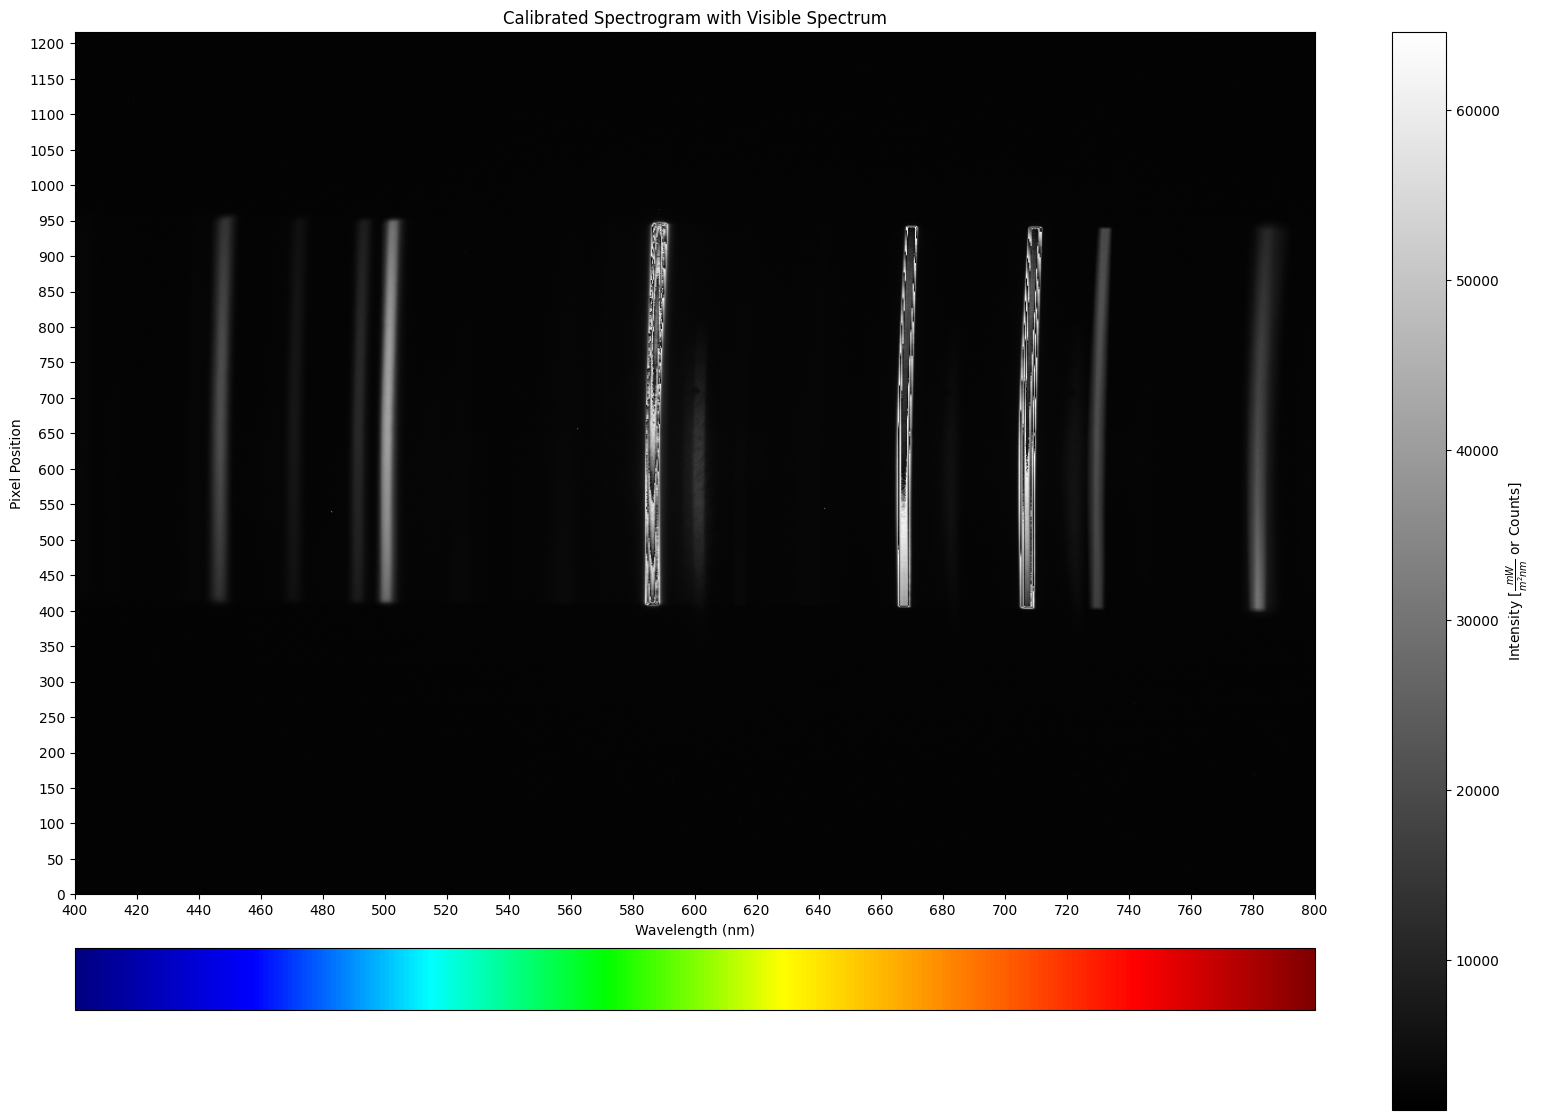

In [6]:
im = He_avg_img
spec, wave = calibration.pix_to_wavelength(im)
visualization.plot_visible_spectrum_cmap(spec, wave)